In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, iradon
from skimage.transform.radon_transform import _get_fourier_filter

import scienceplots
import medimage as medimg

plt.style.use(['science', 'notebook', 'grid'])

### Definición de funciones generales

## EJERCICIO 1

1.0


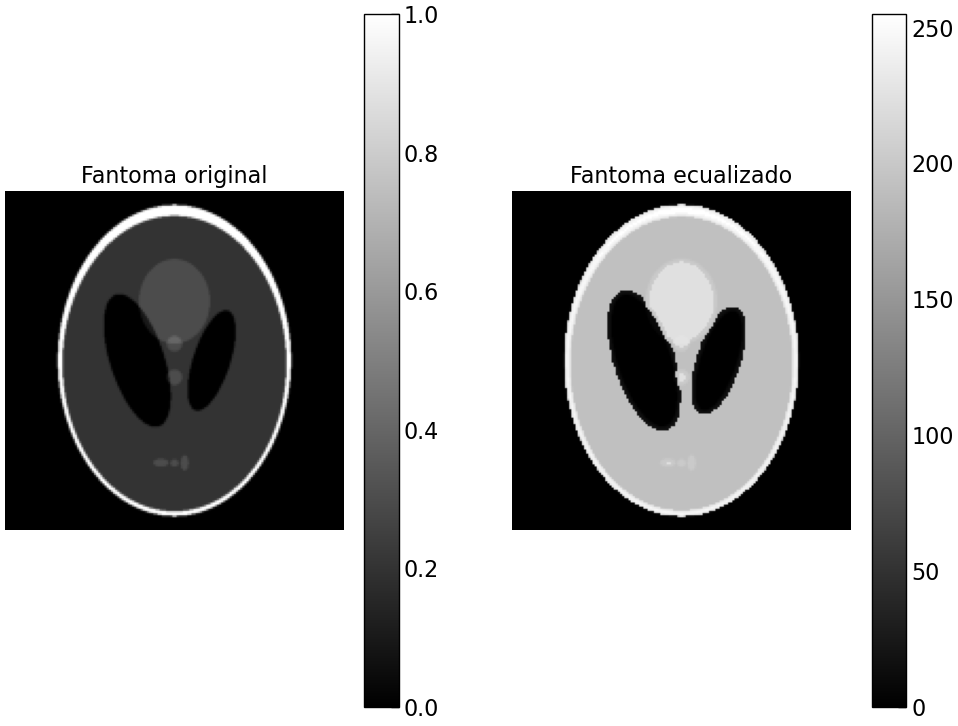

In [6]:
fantoma = shepp_logan_phantom()

fantoma = rescale(fantoma, scale=0.4, mode='reflect')#, channel_axis=None)

fantoma_eq = medimg.equalizer(cv2.normalize(fantoma, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F))

print(fantoma.max())

# Frantoma original
plt.figure(figsize=(12, 9))
plt.grid()
plt.axis('off')
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Fantoma original')
plt.imshow(fantoma, cmap='gray')
#Poner barra de color
plt.colorbar()
# plt.savefig('./../doc/images/ej_1/fantoma.png', dpi=300)
# plt.show()
plt.subplot(1, 2, 2)
# Fantoma ecualizado
plt.title('Fantoma ecualizado')
# plt.figure(figsize=(12, 9))
fantoma_eq = cv2.normalize(fantoma_eq, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.grid()
plt.imshow(fantoma_eq, cmap='gray')
plt.colorbar()
# plt.savefig('./../doc/images/ej_1/fantoma_eq.png', dpi=300)
plt.axis('off')
plt.show()

# fantoma = cv2.normalize(fantoma, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# Guardo cada imagen por separado
# Guardo la imagen ecualizada como pgm

# cv2.imwrite('./../doc/images/ej_1/fantoma_eq.png', fantoma_eq)
# cv2.imwrite('./../doc/images/ej_1/fantoma.png', cv2.normalize(fantoma, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F))

## EJERCICIO 2

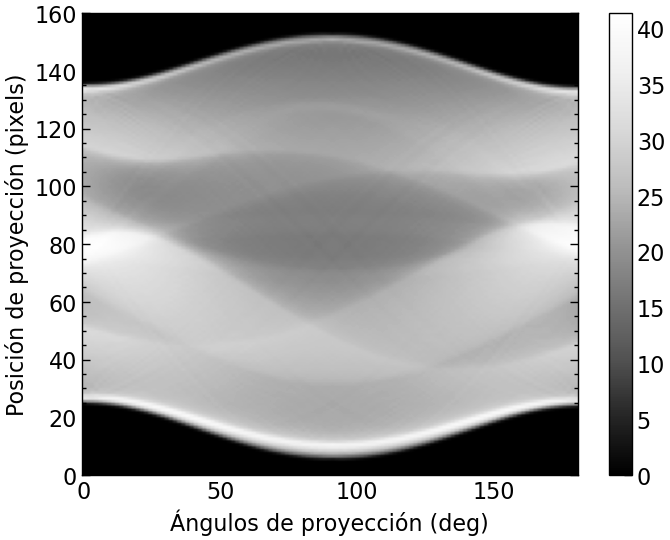

In [202]:
## EJERCICIO 2

theta = np.linspace(0., 180., 120, endpoint=False)
sinogram = radon(fantoma, theta=theta)

dx, dy = 0.5 * 180.0 / max(fantoma.shape), 0.5 / sinogram.shape[0]
# plt.axis('off')
plt.grid()
# plt.title("Radon transform\n(Sinogram)")
plt.xlabel("Ángulos de proyección (deg)")
plt.ylabel("Posición de proyección (pixels)")
plt.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy), aspect='auto')
plt.colorbar()
plt.savefig('./../doc/images/ej_2/sinogram.png', dpi=300)

# cv2.imwrite('./../doc/images/ej_2/sinogram.png', cv2.normalize(sinogram, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_32F))

## EJERCICIO 3

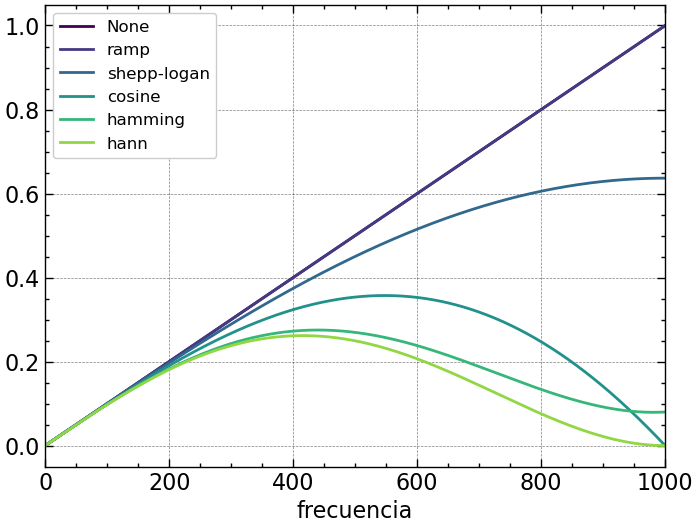

FBP rms reconstruction error: 0.0286


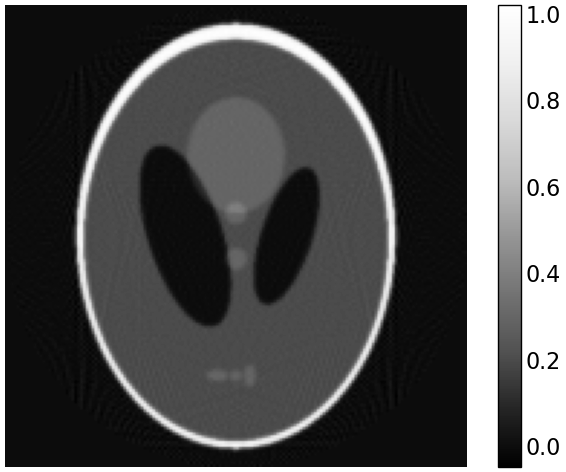

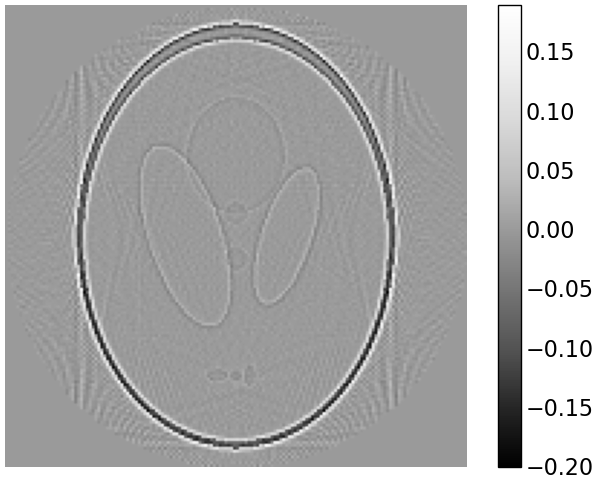

In [215]:
filters = ['None', 'ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']  # Pongo los tipos de filtros a utilizar
theta = np.linspace(0., 180., 120, endpoint=False)
cm = plt.get_cmap('viridis')

for ix, f in enumerate(filters):    # Imprimo la curva de los filtros
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f, color=cm(1. * ix / len(filters)))

plt.xlim([0, 1000])
plt.xlabel('frecuencia')
plt.legend(fontsize=12)
plt.savefig('./../doc/images/ej_3/fourier_filters.png')
plt.show()

reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')  # Hago la retroproyeccion filtrada
error = reconstruction_fbp - fantoma
print(f'FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}')

plt.grid()
plt.axis('off')
plt.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_3/reconstruction_fbp.png', dpi=300)
plt.show()

plt.grid()
plt.axis('off')
plt.imshow(reconstruction_fbp - fantoma, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_3/reconstruction_error.png', dpi=300)
plt.show()


# imkwargs = dict(vmin=-0.2, vmax=0.2)
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5), sharex=True, sharey=True)
# ax1.set_title("Reconstruction\nFiltered back projection")
# ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
# ax1.grid()
# ax2.set_title("Reconstruction error\nFiltered back projection")
# ax2.imshow(reconstruction_fbp - fantoma, cmap=plt.cm.Greys_r, **imkwargs)
# ax2.grid()
# plt.show()

## EJERCICIO 4

Estudiar dependencia del error de reconstrucción por variación de los parametros: filtros, numero de detectores, angulos

In [224]:
# def fbp_test(image, scale, n_angles, filter_name='shepp-logan'):    # Funcion para hacer el test de la retroproyeccion filtrada a partir de una imagen
#     image_scaled = rescale(image, scale=scale, mode='reflect')
#     theta = np.linspace(0., 180., n_angles, endpoint=False)
#     sinogram = radon(image_scaled, theta=theta)
#     reconstruction_fbp = iradon(sinogram, theta=theta, filter_name=filter_name)
#     return reconstruction_fbp, image_scaled, sinogram

def fbp_test(image, scale, theta, filter_name='shepp-logan'):    # Funcion para hacer el test de la retroproyeccion filtrada a partir de una imagen
    image_scaled = rescale(image, scale=scale, mode='reflect')
    # theta = np.linspace(0., 180., n_angles, endpoint=False)
    sinogram = radon(image_scaled, theta=theta)
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name=filter_name)
    return reconstruction_fbp, image_scaled, sinogram

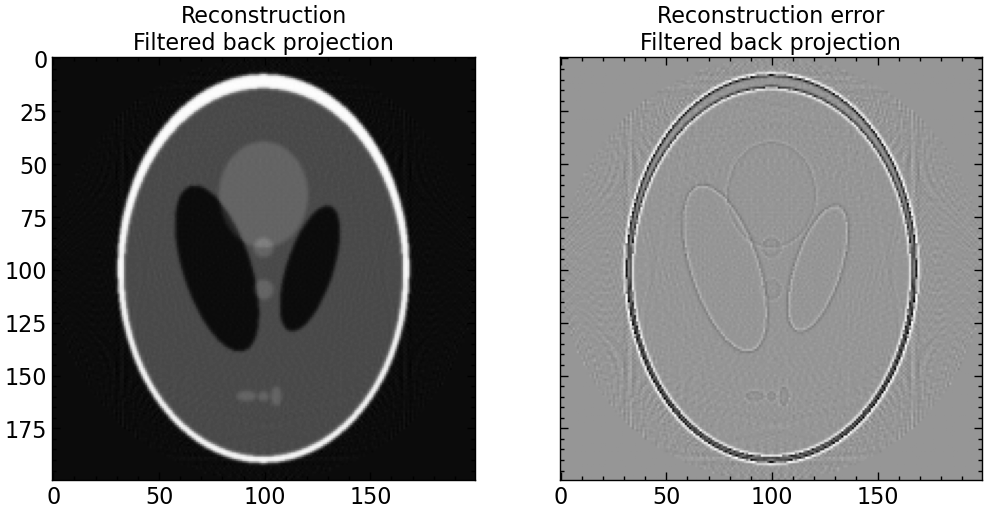

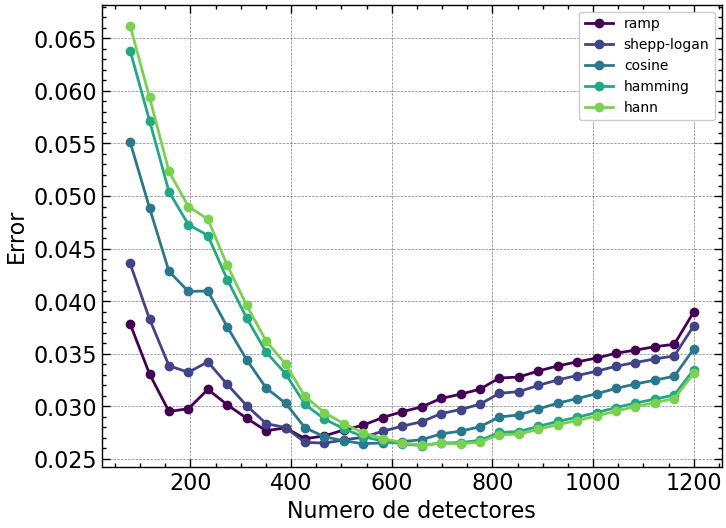

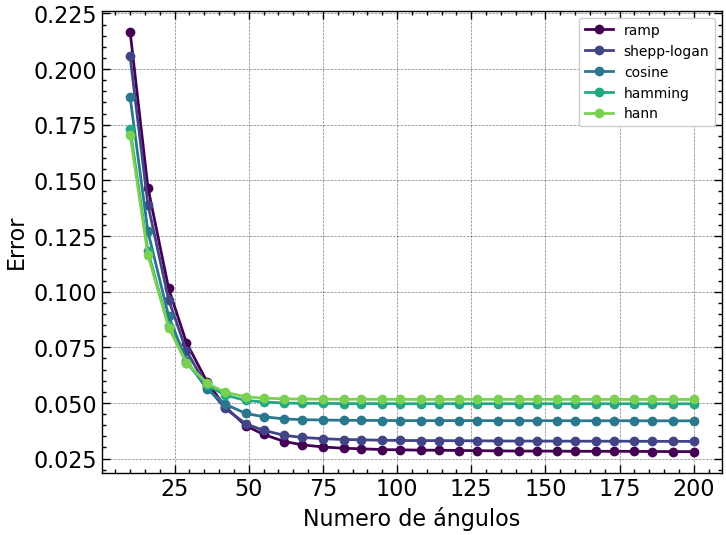

In [219]:
# Importo y reescaleo el fantoma para establecer los numeros de detectores
fantoma = shepp_logan_phantom() # (400, 400)

reconstruction_fantoma, fantoma_scaled, _ = fbp_test(fantoma, 0.5, np.linspace(0., 180., 120, endpoint=False), 'shepp-logan')


imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fantoma, cmap=plt.cm.Greys_r)
ax1.grid()
ax2.set_title("Reconstruction error\nFiltered back projection")
ax2.imshow(reconstruction_fantoma - fantoma_scaled, cmap=plt.cm.Greys_r, **imkwargs)
ax2.grid()
plt.show()


# Genero diferentes imagenes con distintos numeros de detectores para cada tipo de filtro
original_size = fantoma.shape
filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']  # Pongo los tipos de filtros a utilizar
n_angles = 120
n_scale = 0.4

theta_fijo = np.linspace(0., 180., n_angles, endpoint=False)

result_scale = {key:[] for key in filters}
result_angle = {key:[] for key in filters}

n_points = 30
scales = np.linspace(0.2, 3, n_points)
angles = np.linspace(10, 200, n_points, dtype=int)

for s, a in zip(scales, angles):
    # print(f'Escala: {s}')
    for f in filters:
        # Errores para los angulos
        reconstruction, image_scaled, _ = fbp_test(fantoma, s, theta_fijo, f)
        error = reconstruction - image_scaled
        error = np.sqrt(np.mean(error**2))
        # print(f'Filtro {f}, escalado {s}, error: {error}')
        result_scale[f].append(error)
        # Errores para los angulos
        reconstruction, image_scaled, _ = fbp_test(fantoma, n_scale, np.linspace(0., 180., a, endpoint=False), f)
        error = reconstruction - image_scaled
        error = np.sqrt(np.mean(error**2))
        # print(f'Filtro {f}, angulos {a}, error: {error}')
        result_angle[f].append(error)

cm = plt.get_cmap('viridis')
for i in range(len(filters)):
    result_scale[filters[i]] = np.array(result_scale[filters[i]])
    plt.plot(original_size[0]*scales, result_scale[filters[i]], '-o', label=filters[i], color=cm(i/len(filters)))

# plt.title('Error de reconstruccion en funcion del escalado')
plt.xlabel('Numero de detectores')
plt.ylabel('Error')
plt.legend(fontsize=10)
plt.savefig('./../doc/images/ej_4/scale_error_2.png', dpi=300)
plt.show()

cm = plt.get_cmap('viridis')
for i in range(len(filters)):
    result_angle[filters[i]] = np.array(result_angle[filters[i]])
    plt.plot(angles, result_angle[filters[i]], '-o', label=filters[i], color=cm(i/len(filters)))

# plt.title('Error de reconstruccion en funcion del numero de angulos')
plt.xlabel('Numero de ángulos')
plt.ylabel('Error')
plt.legend(fontsize=10)
plt.savefig('./../doc/images/ej_4/angle_error_2.png', dpi=300)
plt.show()


Reconstruyo con Ramp y Hann en 200 y 800 detectores, y 20 y 150 angulos

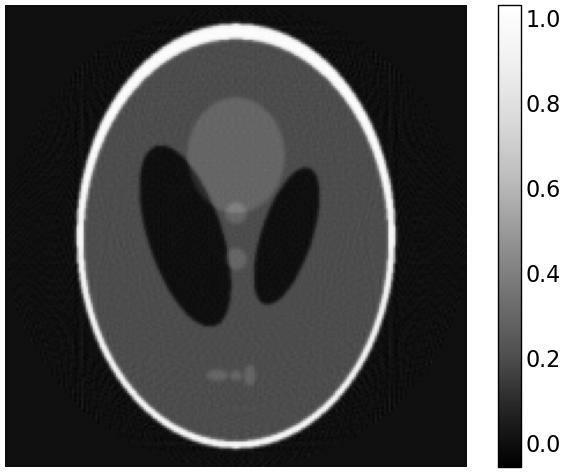

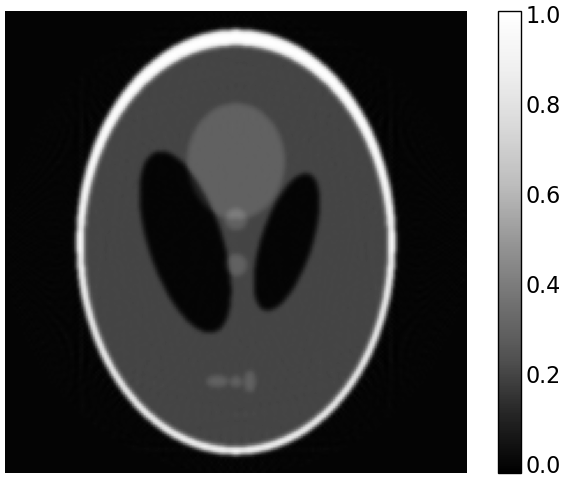

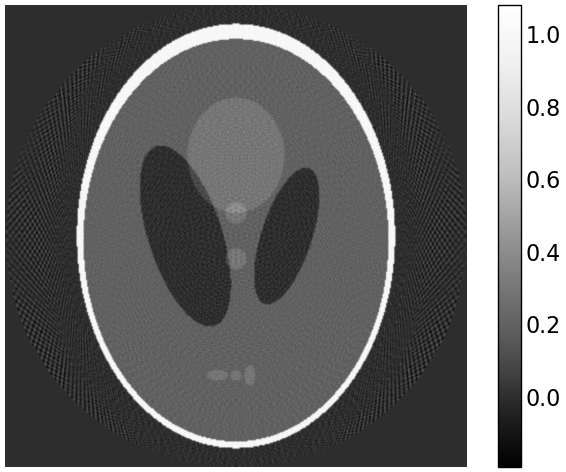

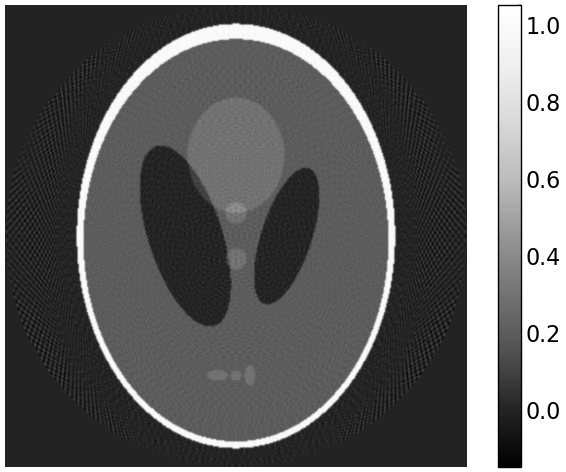

In [229]:
fantoma = shepp_logan_phantom() # (400, 400)

fbp_fantoma_200_ramp, _ ,_ = fbp_test(fantoma, 0.5, np.linspace(0., 180., 120, endpoint=False), 'ramp')
fbp_fantoma_200_hann, _ ,_ = fbp_test(fantoma, 0.5, np.linspace(0., 180., 120, endpoint=False), 'hann')
fbp_fantoma_800_ramp, _ ,_ = fbp_test(fantoma, 2, np.linspace(0., 180., 120, endpoint=False), 'ramp')
fbp_fantoma_800_hann, _ ,_ = fbp_test(fantoma, 2, np.linspace(0., 180., 120, endpoint=False), 'hann')

plt.grid()
plt.axis('off')
plt.imshow(fbp_fantoma_200_ramp, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_4/fbp_fantoma_200_ramp.png', dpi=300)
plt.show()

plt.grid()
plt.axis('off')
plt.imshow(fbp_fantoma_200_hann, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_4/fbp_fantoma_200_hann.png', dpi=300)
plt.show()

plt.grid()
plt.axis('off')
plt.imshow(fbp_fantoma_800_ramp, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_4/fbp_fantoma_800_ramp.png', dpi=300)
plt.show()

plt.grid()
plt.axis('off')
plt.imshow(fbp_fantoma_800_hann, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_4/fbp_fantoma_800_hann.png', dpi=300)
plt.show()


## EJERCICIO 5

Agregar ruido al sinograma y estudiar los efectos de los distintos tipos en la reconstruccion

In [230]:
def noiserer(image, level):
    noise = level*np.random.normal(0, 1, image.shape)
    return image + noise

# def sinogram_generator(image, scale, n_angles):
#     image_scaled = rescale(image, scale=scale, mode='reflect')
#     theta = np.linspace(0., 180., n_angles, endpoint=False)
#     sinogram = radon(image_scaled, theta=theta)
#     return sinogram
def sinogram_generator(image, scale, theta):
    image_scaled = rescale(image, scale=scale, mode='reflect')
    # theta = np.linspace(0., 180., n_angles, endpoint=False)
    sinogram = radon(image_scaled, theta=theta)
    return sinogram

def fbp(sinogram, theta, filter_name='shepp-logan'):
    # theta = np.linspace(0., 180., n_angles, endpoint=False)
    reconstruction_fbp = iradon(sinogram, theta=theta, filter_name=filter_name)
    return reconstruction_fbp

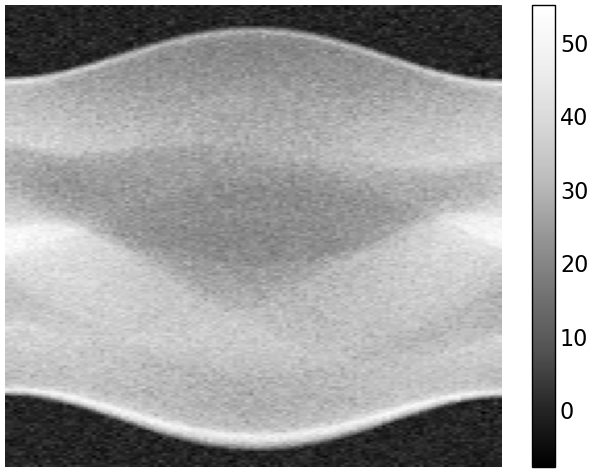

In [236]:
# Agrega ruido a un sinograma y lo guarda
fantoma = shepp_logan_phantom() # (400, 400)

sinogram = sinogram_generator(fantoma, 0.5, np.linspace(0., 180., 120, endpoint=False))
sinogram_noisy = noiserer(sinogram, 2)

dx, dy = 0.5 * 180.0 / max(fantoma.shape), 0.5 / sinogram.shape[0]
plt.axis('off')
plt.grid()
# plt.title("Radon transform\n(Sinogram)")
# plt.xlabel("Ángulos de proyección (deg)")
# plt.ylabel("Posición de proyección (pixels)")
plt.imshow(sinogram_noisy, cmap=plt.cm.Greys_r, extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy), aspect='auto')
plt.colorbar()
plt.savefig('./../doc/images/ej_5/sinogram_noisy.png', dpi=300)


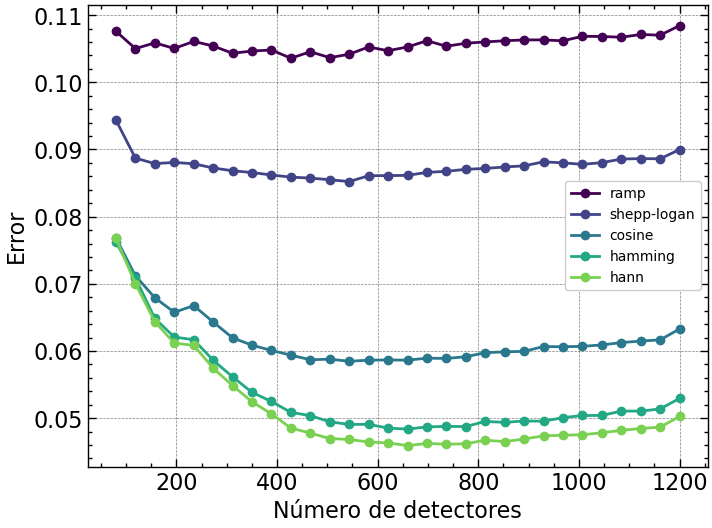

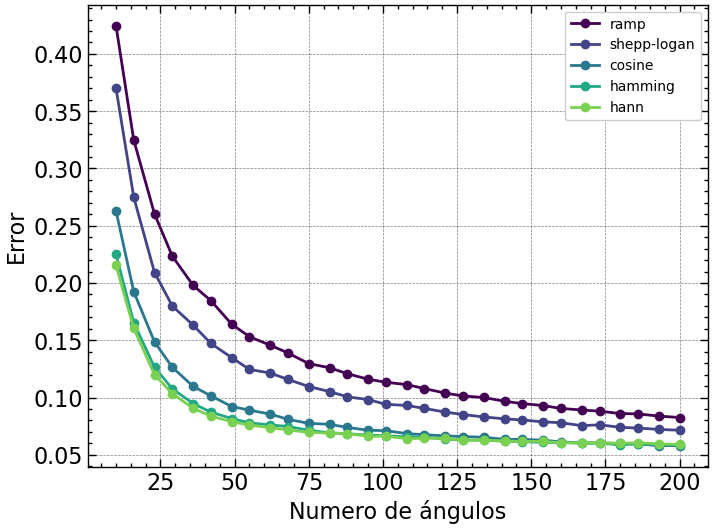

In [232]:
fantoma = shepp_logan_phantom() # (400, 400)
n_angles = 500
scale = 0.5
noisy_level = 2


# Genero diferentes imagenes con distintos numeros de detectores para cada tipo de filtro
original_size = fantoma.shape
filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']  # Pongo los tipos de filtros a utilizar
n_angles = 120
n_scale = 0.4

theta_fijo = np.linspace(0., 180., n_angles, endpoint=False)

result_scale = {key:[] for key in filters}
result_angle = {key:[] for key in filters}

n_points = 30
scales = np.linspace(0.2, 3, n_points)
angles = np.linspace(10, 200, n_points, dtype=int)

for s, a in zip(scales, angles):
    # print(f'Escala: {s}')
    for f in filters:
        # Errores para las escalas
        sinogram = sinogram_generator(fantoma, s, theta_fijo)
        sinogram_noisy = noiserer(sinogram, noisy_level)
        reconstruction = fbp(sinogram_noisy, theta_fijo, f)
        image_scaled = rescale(fantoma, scale=s, mode='reflect')
        error = reconstruction - image_scaled
        error = np.sqrt(np.mean(error**2))
        # print(f'Filtro {f}, escalado {s}, error: {error}')
        result_scale[f].append(error)

        # Errores para los angulos
        theta = np.linspace(0., 180., a, endpoint=False)
        sinogram = sinogram_generator(fantoma, n_scale, theta)
        sinogram_noisy = noiserer(sinogram, noisy_level)
        reconstruction = fbp(sinogram_noisy, theta, f)
        image_scaled = rescale(fantoma, scale=n_scale, mode='reflect')
        error = reconstruction - image_scaled
        error = np.sqrt(np.mean(error**2))
        # print(f'Filtro {f}, angulos {a}, error: {error}')
        result_angle[f].append(error)

cm = plt.get_cmap('viridis')
for i in range(len(filters)):
    result_scale[filters[i]] = np.array(result_scale[filters[i]])
    plt.plot(original_size[0]*scales, result_scale[filters[i]], '-o', label=filters[i], color=cm(i/len(filters)))

# plt.title('Error de reconstruccion en funcion del escalado')
plt.xlabel('Número de detectores')
plt.ylabel('Error')
plt.legend(fontsize=10)
plt.savefig('./../doc/images/ej_5/scale_error_noisy.png', dpi=300)
plt.show()

cm = plt.get_cmap('viridis')
for i in range(len(filters)):
    result_angle[filters[i]] = np.array(result_angle[filters[i]])
    plt.plot(angles, result_angle[filters[i]], '-o', label=filters[i], color=cm(i/len(filters)))

# plt.title('Error de reconstruccion en funcion del numero de angulos')
plt.xlabel('Numero de ángulos')
plt.ylabel('Error')
plt.legend(fontsize=10)
plt.savefig('./../doc/images/ej_5/angle_error_noisy.png', dpi=300)
plt.show()


Ploteo algunas imagenes para ver como queda la original y la reconstruida a partir de un sinograma con ruido

En funcion del numero de detectores

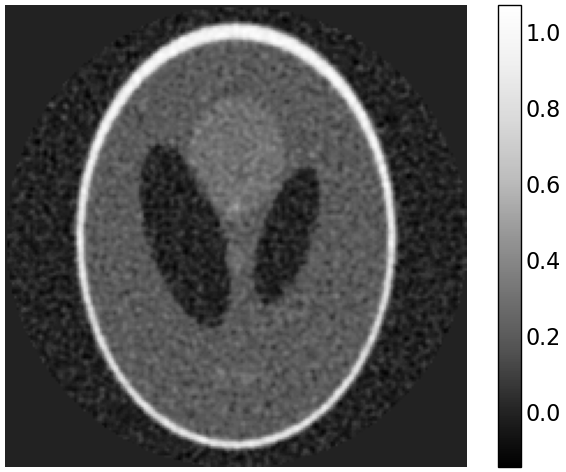

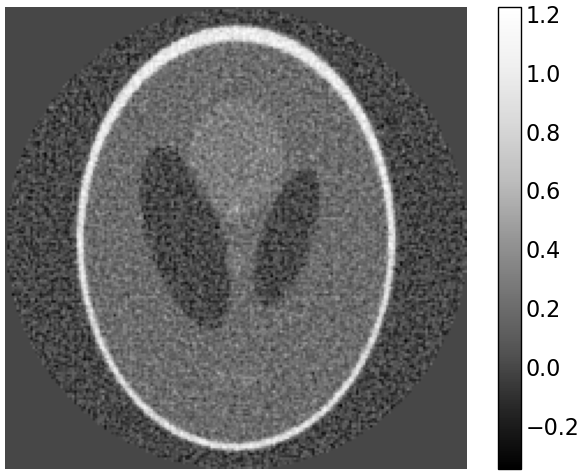

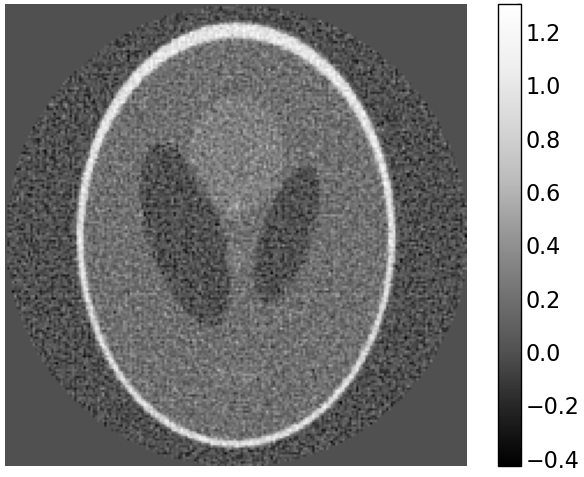

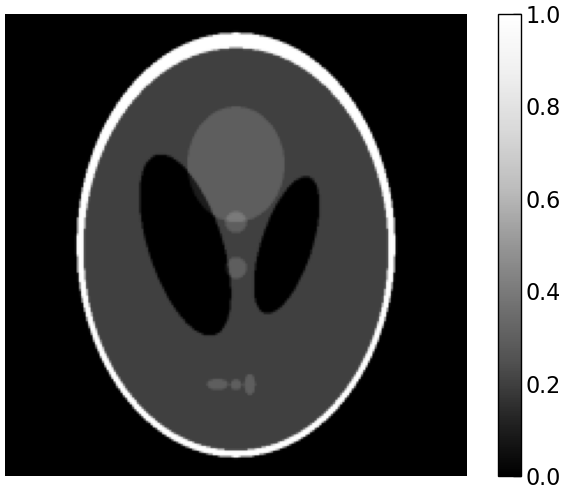

In [238]:
# Muestra un ejemplo de la imagen reconstruida con hann, sheoo-logan y ramp
fantoma = shepp_logan_phantom() # (400, 400)
n_angles = 120
scale = 0.5

sinogram = sinogram_generator(fantoma, scale, np.linspace(0., 180., n_angles, endpoint=False))
sinogram_noisy = noiserer(sinogram, 2)

reconstruction_hann = fbp(sinogram_noisy, np.linspace(0., 180., n_angles, endpoint=False), 'hann')
reconstruction_shepp_logan = fbp(sinogram_noisy, np.linspace(0., 180., n_angles, endpoint=False), 'shepp-logan')
reconstruction_ramp = fbp(sinogram_noisy, np.linspace(0., 180., n_angles, endpoint=False), 'ramp')
# reconstruction_original = fbp(sinogram, np.linspace(0., 180., n_angles, endpoint=False), 'ramp')

# Imprime todas las imagenes recosntruidas
plt.grid()
plt.axis('off')
plt.imshow(reconstruction_hann, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_5/reconstruction_hann.png', dpi=300)
plt.show()

plt.grid()
plt.axis('off')
plt.imshow(reconstruction_shepp_logan, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_5/reconstruction_shepp_logan.png', dpi=300)
plt.show()

plt.grid()
plt.axis('off')
plt.imshow(reconstruction_ramp, cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_5/reconstruction_ramp.png', dpi=300)
plt.show()

plt.grid()
plt.axis('off')
plt.imshow(rescale(fantoma, 0.5,  mode='reflect'), cmap=plt.cm.Greys_r)
plt.colorbar()
plt.savefig('./../doc/images/ej_5/reconstruction_original.png', dpi=300)
plt.show()


En funcion del numerod de angulos

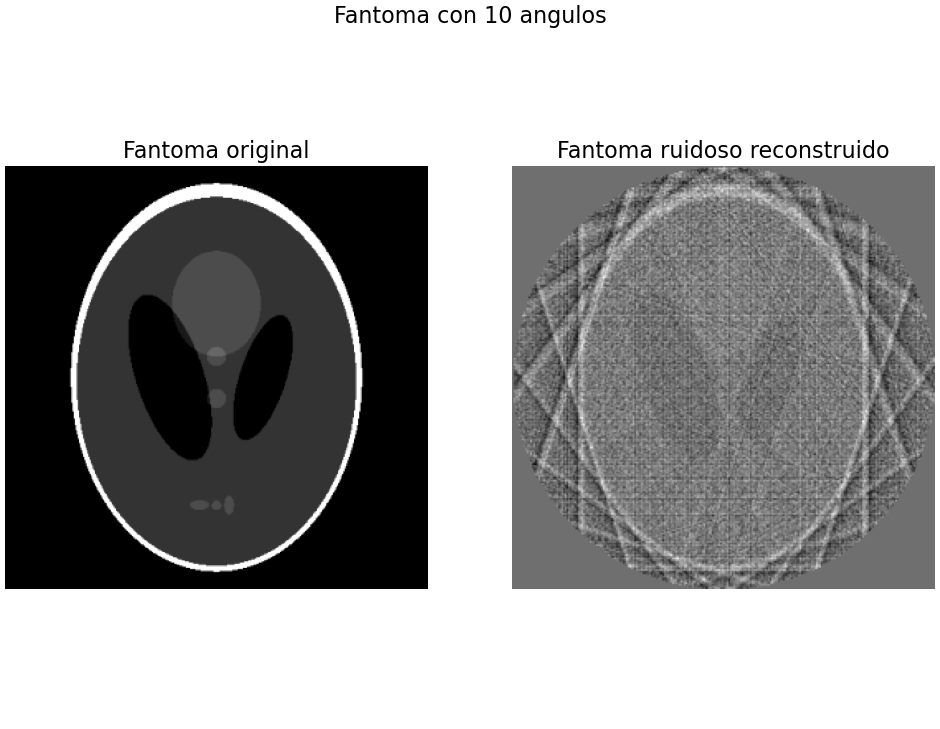

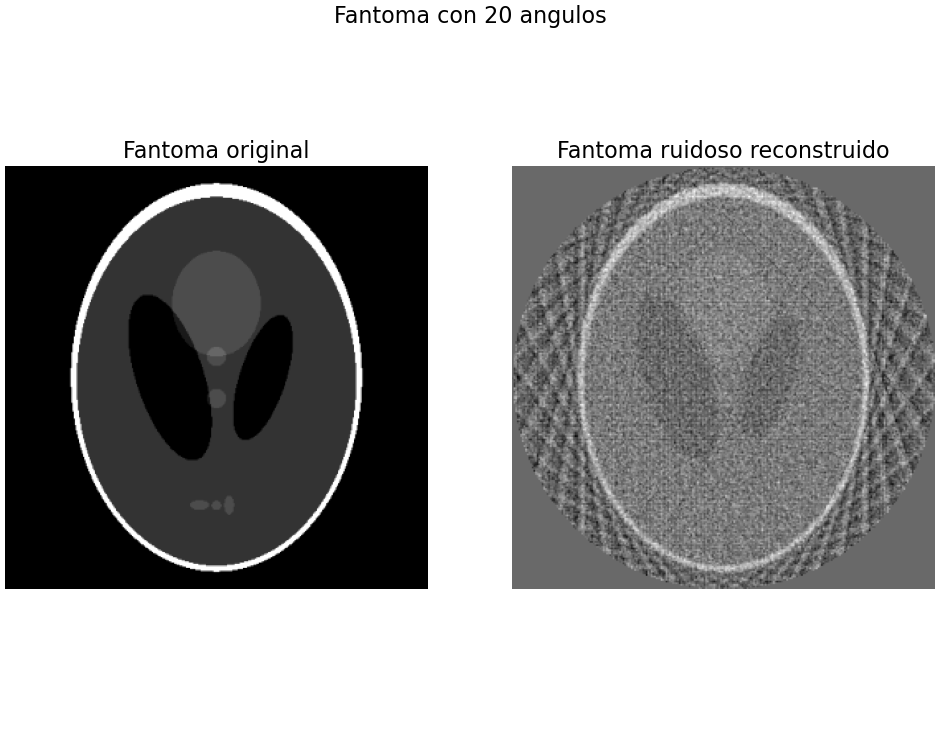

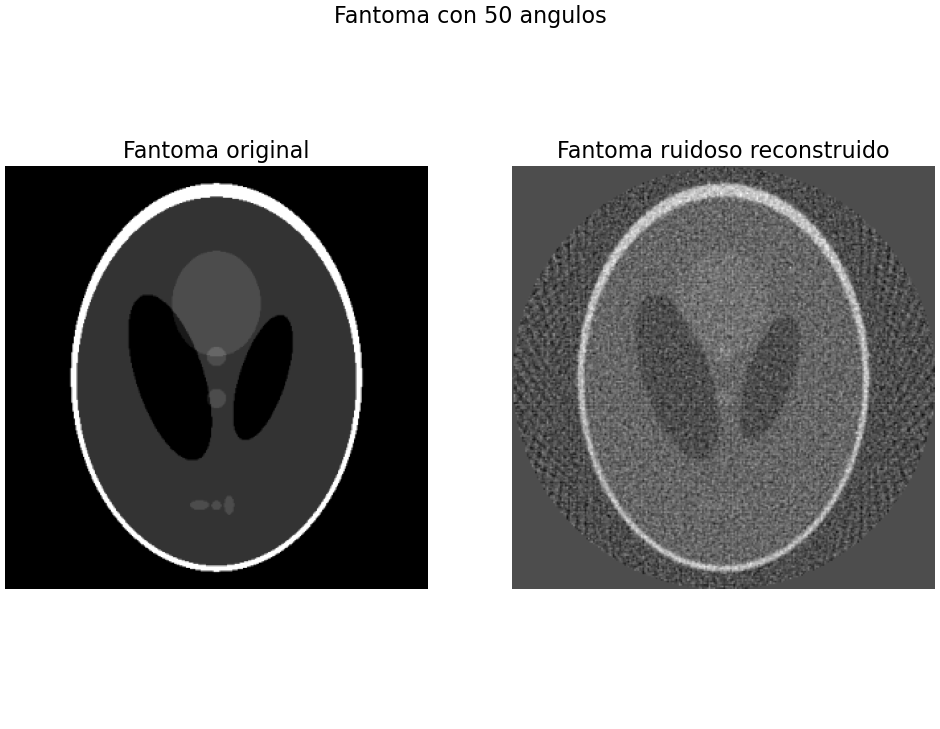

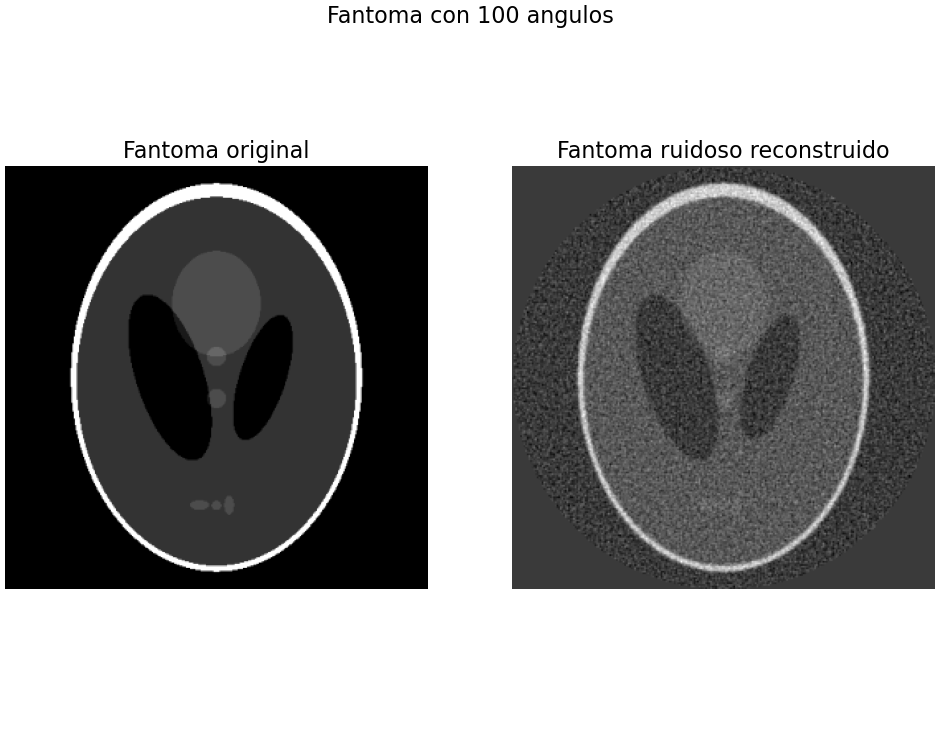

In [123]:
fantoma = shepp_logan_phantom() # (400, 400)
angulos = [10, 20, 50, 100]
escale = 0.8
filter_name = 'shepp-logan'

# fantomas_scales = []
# sinogramas_noisy = []
# image_reconstructed = []
n_angles = 120
for i in range(len(angulos)):
    fantoma_scale = rescale(fantoma, scale=escale, mode='reflect')
    sinogram = sinogram_generator(fantoma_scale, escale, np.linspace(0., 180., angulos[i], endpoint=False))
    sinogram_noisy = noiserer(sinogram, noisy_level)
    image_reconstructed = fbp(sinogram_noisy, np.linspace(0., 180., angulos[i], endpoint=False), filter_name)
    plt.figure(figsize=(12, 9))
    plt.grid()
    plt.axis('off')
    plt.title(f'Fantoma con {angulos[i]} angulos')
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title(f'Fantoma original')
    plt.imshow(fantoma_scale, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(f'Fantoma ruidoso reconstruido')
    plt.imshow(image_reconstructed, cmap='gray')
    plt.axis('off')
    plt.show()

## EJERCICIO 6

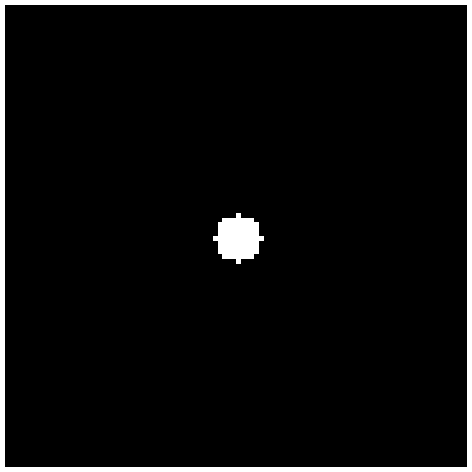

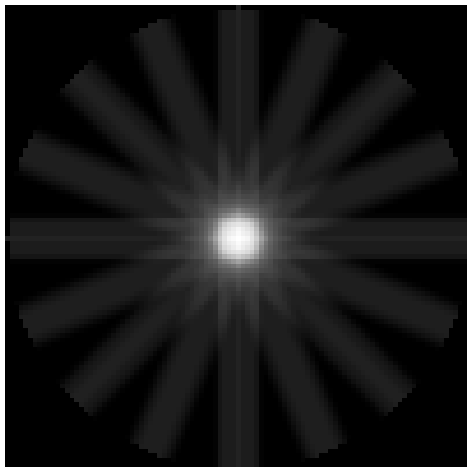

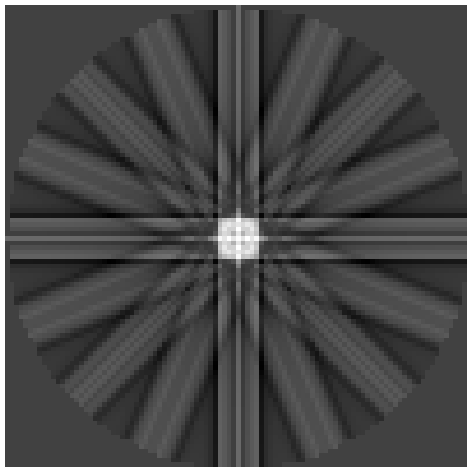

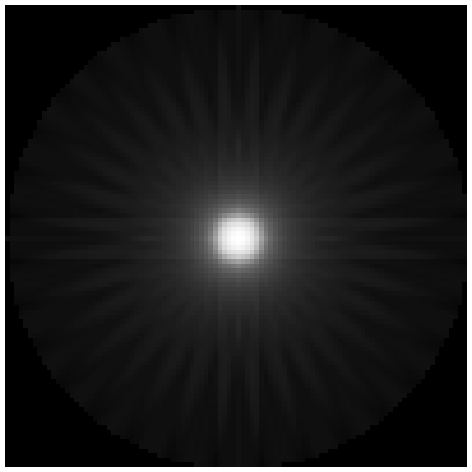

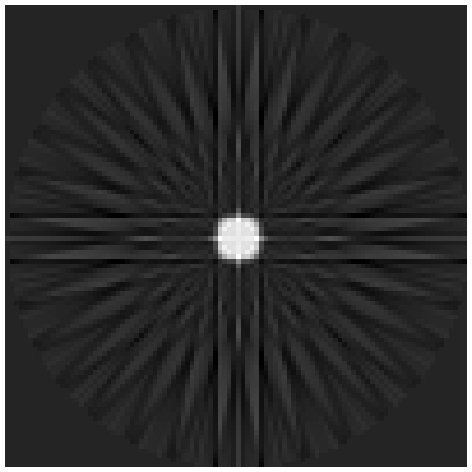

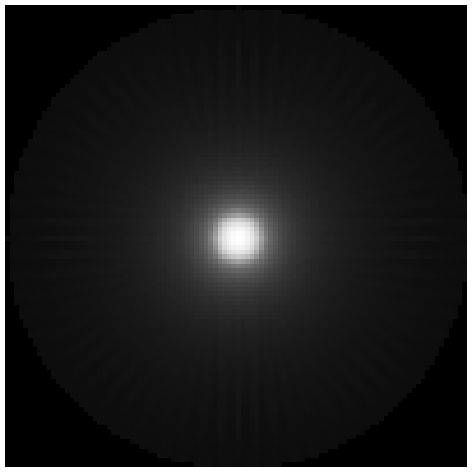

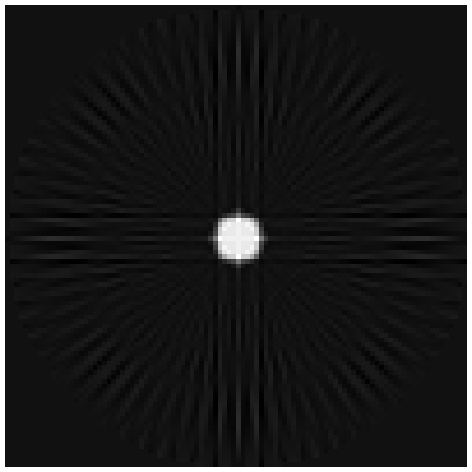

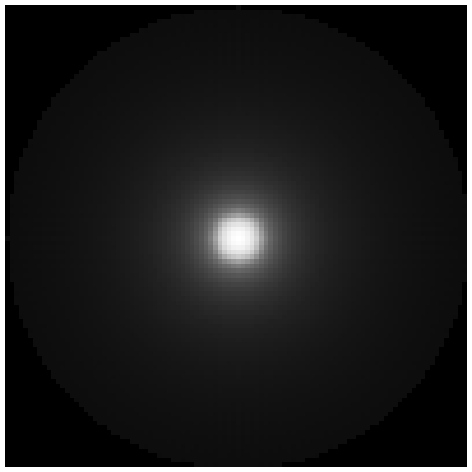

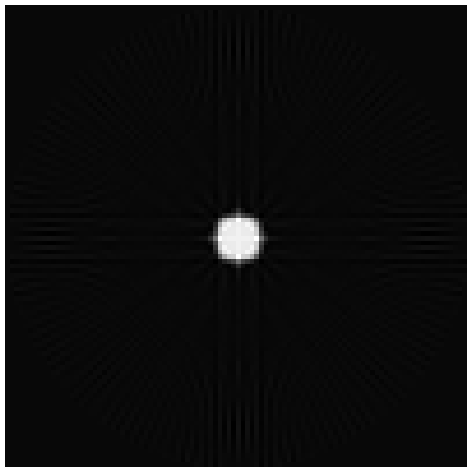

In [245]:
size = 100

image = np.zeros((size, size))
# Dibujo un circulo blanco en el centro de 5 pixeles
radius = 5
center = (size//2, size//2)
cv2.circle(image, center, radius, 255, -1)
# for i in range(len(image)):
#     for j in range(len(image[0])):
#         if (i-center[0])**2 + (j-center[1])**2 < radius**2:
#             image[i][j] = 255

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.grid()
# plt.colorbar()
plt.savefig('./../doc/images/ej_6/circle.png', dpi=300)
plt.show()

scale = 1
angles = [8, 16, 32, 64]
for i in range(len(angulos)):
    # fantoma_scale = rescale(fantoma, scale=escale, mode='reflect')
    sinogram = sinogram_generator(image, scale, np.linspace(0., 180., angles[i], endpoint=False))
    image_reconstructed_none = iradon(sinogram, theta=np.linspace(0., 180., angles[i], endpoint=False), filter_name=None)
    image_reconstructed_ramp = iradon(sinogram, theta=np.linspace(0., 180., angles[i], endpoint=False), filter_name='ramp')
    # plt.figure(figsize=(12, 9))
    plt.grid()
    plt.axis('off')
    # plt.title(f'Sin filtro')
    plt.imshow(image_reconstructed_none, cmap='gray')
    # plt.colorbar()
    plt.savefig(f'./../doc/images/ej_6/circle_none_{angles[i]}.png', dpi=300)
    plt.show()
    # plt.subplot(1, 2, 2)
    # plt.title(f'Ramp')
    plt.grid()
    plt.axis('off')
    plt.imshow(image_reconstructed_ramp, cmap='gray')
    # plt.colorbar()
    plt.savefig(f'./../doc/images/ej_6/circle_ramp_{angles[i]}.png', dpi=300)
    plt.show()



## EJERCICIO 7

Si un detector tiene falla y no detecta nada, se genera una linea negra para el x' correspondiente. Se puede simular esto poniendo un 0 en el sinograma correspondiente a ese detector.

(400, 120)


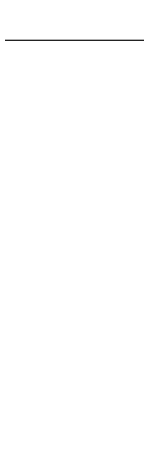

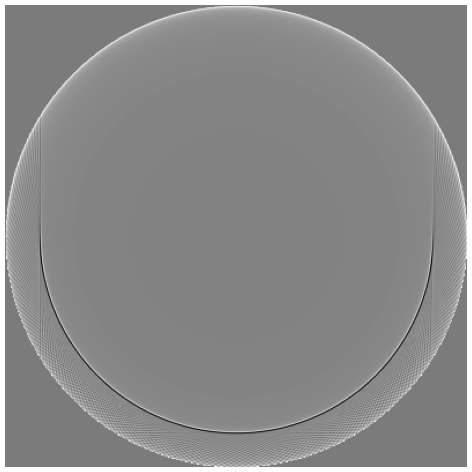

In [148]:
# 
size = 400
n_angles = 120
line = 80
# scale = 0.5

sinogram = np.ones((size, n_angles))*255
print(sinogram.shape)
sinogram[line, :] = 0
plt.axis('off')
plt.grid()
plt.imshow(sinogram, cmap='gray')
plt.show() 

image = iradon(sinogram, theta=np.linspace(0., 180., n_angles, endpoint=False), filter_name='ramp')
plt.axis('off')
plt.grid()
plt.imshow(image, cmap='gray')
plt.show()




(400, 120)


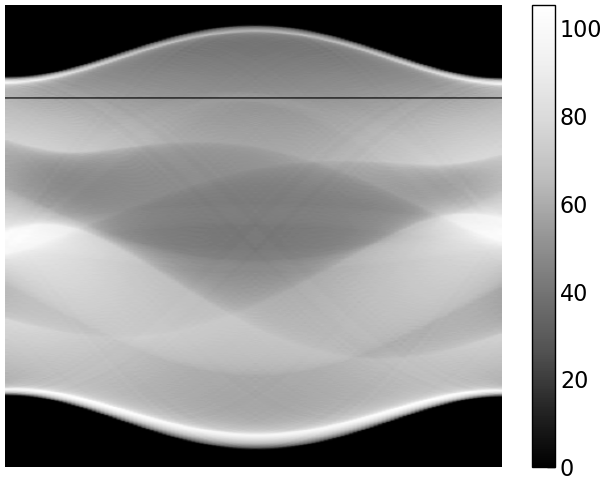

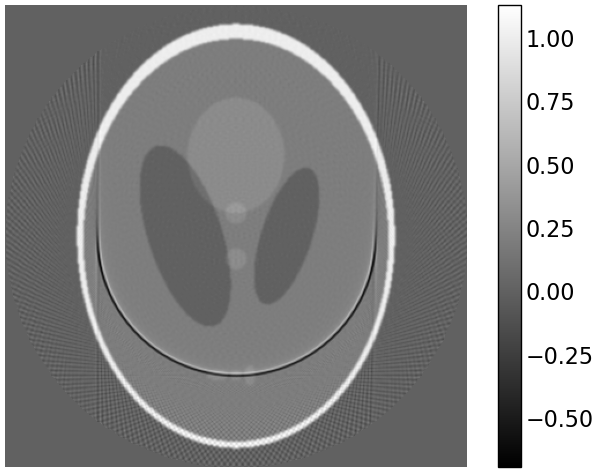

In [246]:
fantoma = shepp_logan_phantom() # (400, 400)
scale = 0.5
line = fantoma.shape[0]//2
line = 80

sinogram = sinogram_generator(fantoma, 1, np.linspace(0., 180., n_angles, endpoint=False))
print(sinogram.shape)

sinogram[line, :] = 0

dx, dy = 0.5 * 180.0 / max(fantoma.shape), 0.5 / sinogram.shape[0]
plt.axis('off')
# plt.title("Radon transform\n(Sinogram)")
# plt.xlabel("Projection angle (deg)")
# plt.ylabel("Projection position (pixels)")
plt.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy), aspect='auto')
plt.colorbar()
plt.savefig('./../doc/images/ej_7/sinogram_line.png', dpi=300)
plt.show()

image = iradon(sinogram, theta=np.linspace(0., 180., n_angles, endpoint=False), filter_name='hann')
plt.axis('off')
plt.grid()
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.savefig('./../doc/images/ej_7/reconstruction_line.png', dpi=300)

